<a href="https://colab.research.google.com/github/SteelworkerDB/AML_WL3/blob/main/EjercicioRedNeuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EJERCICIO SIMPLE SOBRE RED NEURONAL (CORE)
---



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model

In [ ]:
filen='/content/heart - heart.csv'
df=pd.read_csv(filen)

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<ipython-input-130-3b086529d52d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


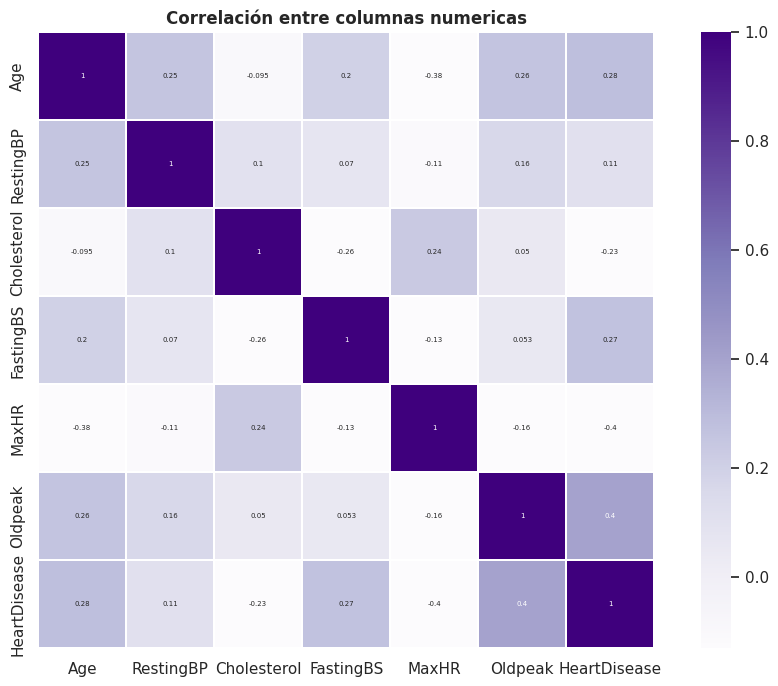

In [ ]:
corr=df.corr()
sns.set (rc = {'figure.figsize':(12,8)})
sns.heatmap(corr, cmap='Purples', vmax=1, vmin=-0.13, square=True,
        linewidths=0.1, annot=True, annot_kws={"size":5});
plt.title('Correlación entre columnas numericas',fontweight='bold');

In [ ]:
X=df.drop(columns='HeartDisease')
y=df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#Instancia de selectores de columna
num_cols=make_column_selector(dtype_include='number')
cat_cols=make_column_selector(dtype_include='object')

In [ ]:
#Instancia de scaler y encoder
scaler=StandardScaler()
ohe=OneHotEncoder()

In [ ]:
#Instancia de transformador de columna
col_transf=ColumnTransformer(transformers=[
    ('num',scaler,num_cols),
    ('cat',ohe,cat_cols)
])

In [ ]:
X_train_p=col_transf.fit_transform(X_train)
X_test_p=col_transf.transform(X_test)


##Modelo Red Neuronal:

In [ ]:
#Número de características de X
input_shape=X_train_p.shape[1]
print(input_shape)

20


In [ ]:
# Modelo base de RN:
model = Sequential()
# Primera capa
model.add(Dense(20,
                input_dim = 20,
                activation = 'relu'))
#Capas intermedias
model.add(Dense(30,
                activation = 'relu'))
model.add(Dense(30,
                activation = 'relu'))
#Capa de salida
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'bce', optimizer = 'adam') #modelo
history = model.fit(X_train_p, y_train,
                    validation_data = (X_test_p, y_test),
                    epochs=100)

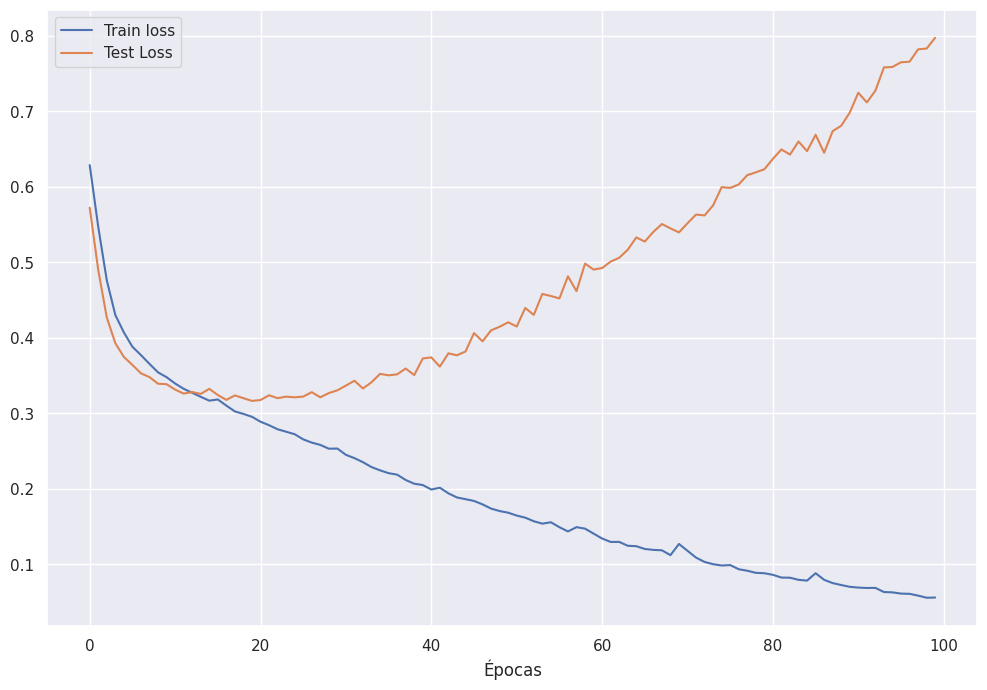

In [ ]:
# Visualizar la perdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Épocas')
plt.legend();


In [ ]:
#Classification report para verificar exactitud, precisión, recall, f1
predictions=model.predict(X_test_p)
y_pred = np.where(predictions > 0.5, 1, 0) #REF https://saturncloud.io/blog/how-to-obtain-predicted-values-in-keras-a-comprehensive-guide/
print(classification_report(y_test,y_pred))

9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       112
           1       0.87      0.80      0.83       164

    accuracy                           0.81       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.82      0.81      0.81       276



- El modelo tiene un recall de 0.8 para encontrar enfermead cardiaca.  Sin embargo, del gráfico, vemos que la pérdida en el valor de prueba aumenta, alejándose de la pérdida de los valores de entrenamiento, el modelo tiende a estar sobreajustado.

**2do Intento**

In [ ]:
#Uso regularizador, y una capa adicional
from tensorflow.keras.regularizers import l2
# Modelo base de RN:
modelr = Sequential()
# Primera capa
modelr.add(Dense(20,
                input_dim = 20,
                activation = 'relu',
                kernel_regularizer=l2(0.01)))
#Capas intermedias
modelr.add(Dense(30,
                activation = 'relu',
                kernel_regularizer=l2(0.01)))
modelr.add(Dense(30,
                activation = 'relu',
                kernel_regularizer=l2(0.01)))
modelr.add(Dense(30,
                activation = 'relu',
                kernel_regularizer=l2(0.01)))
#Capa de salida
modelr.add(Dense(1, activation = 'sigmoid'))

In [ ]:
modelr.compile(loss = 'bce', optimizer = 'adam') #modelo
history_reg = modelr.fit(X_train_p, y_train,
                    validation_data = (X_test_p, y_test),
                    epochs=200) #cambio número de épocas

Epoch 1/200
21/21 [==============================] - 3s 21ms/step - loss: 1.6337 - val_loss: 1.5093
Epoch 2/200
21/21 [==============================] - 0s 7ms/step - loss: 1.4409 - val_loss: 1.3175
Epoch 3/200
21/21 [==============================] - 0s 6ms/step - loss: 1.2622 - val_loss: 1.1414
Epoch 4/200
21/21 [==============================] - 0s 4ms/step - loss: 1.1124 - val_loss: 1.0048
Epoch 5/200
21/21 [==============================] - 0s 7ms/step - loss: 0.9954 - val_loss: 0.9074
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.9079 - val_loss: 0.8344
Epoch 7/200
21/21 [==============================] - 0s 4ms/step - loss: 0.8318 - val_loss: 0.7723
Epoch 8/200
21/21 [==============================] - 0s 6ms/step - loss: 0.7749 - val_loss: 0.7151
Epoch 9/200
21/21 [==============================] - 0s 4ms/step - loss: 0.7246 - val_loss: 0.6788
Epoch 10/200
21/21 [==============================] - 0s 4ms/step - loss: 0.6867 - val_loss: 0.6309
Epoch 11

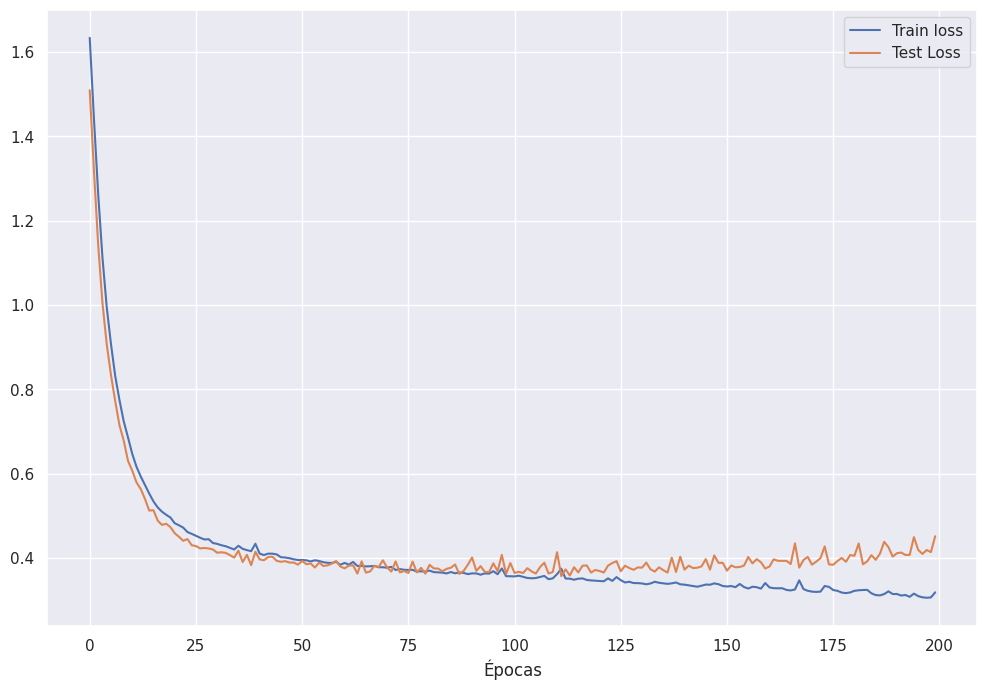

In [ ]:
# Visualizar la perdida
plt.plot(history_reg.history['loss'], label='Train loss')
plt.plot(history_reg.history['val_loss'], label='Test Loss')
plt.xlabel('Épocas')
plt.legend();

In [ ]:
#Classification report para verificar exactitud, precisión, recall, f1
predictions=modelr.predict(X_test_p)
y_pred = np.where(predictions > 0.5, 1, 0) #REF https://saturncloud.io/blog/how-to-obtain-predicted-values-in-keras-a-comprehensive-guide/
print(classification_report(y_test,y_pred))

9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       112
           1       0.94      0.80      0.87       164

    accuracy                           0.86       276
   macro avg       0.85      0.87      0.85       276
weighted avg       0.87      0.86      0.86       276



-Menor sobreajuste como se puede observar en el gráfico.  Este modelo tiene más precisión.  Sin embargo el recall es importante para detectar enfermedades, y este modelo no mejora ese parámetro.

**3er Intento**

In [ ]:
#Aumento de neuronas en las capas junto con regularizador
from tensorflow.keras.regularizers import l2
# Modelo base de RN:
modelr2 = Sequential()
# Primera capa
modelr2.add(Dense(20,
                input_dim = 20,
                activation = 'relu',
                kernel_regularizer=l2(0.01)))
#Capas intermedias
modelr2.add(Dense(60,
                activation = 'relu',
                kernel_regularizer=l2(0.01)))
modelr2.add(Dense(60,
                activation = 'relu',
                kernel_regularizer=l2(0.01)))
modelr2.add(Dense(60,
                activation = 'relu',
                kernel_regularizer=l2(0.01)))
#Capa de salida
modelr2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
modelr2.compile(loss = 'bce', optimizer = 'adam') #modelo
history_2reg = modelr.fit(X_train_p, y_train,
                    validation_data = (X_test_p, y_test),
                    epochs=200) # mismo número de épocas que intento anterior

Epoch 1/200
21/21 [==============================] - 0s 7ms/step - loss: 0.2328 - val_loss: 0.5059
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2725 - val_loss: 0.4950
Epoch 3/200
21/21 [==============================] - 0s 6ms/step - loss: 0.2449 - val_loss: 0.4873
Epoch 4/200
21/21 [==============================] - 0s 7ms/step - loss: 0.2355 - val_loss: 0.4886
Epoch 5/200
21/21 [==============================] - 0s 6ms/step - loss: 0.2339 - val_loss: 0.4923
Epoch 6/200
21/21 [==============================] - 0s 6ms/step - loss: 0.2334 - val_loss: 0.5050
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2316 - val_loss: 0.5043
Epoch 8/200
21/21 [==============================] - 0s 4ms/step - loss: 0.2729 - val_loss: 0.4998
Epoch 9/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2380 - val_loss: 0.4956
Epoch 10/200
21/21 [==============================] - 0s 4ms/step - loss: 0.2344 - val_loss: 0.5057
Epoch 11/

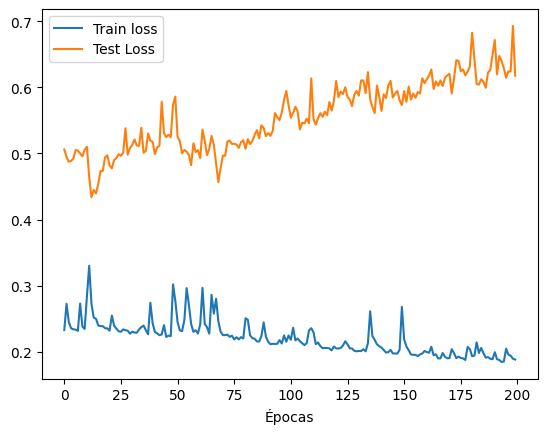

In [ ]:
# Visualizar la perdida
plt.plot(history_2reg.history['loss'], label='Train loss')
plt.plot(history_2reg.history['val_loss'], label='Test Loss')
plt.xlabel('Épocas')
plt.legend();

In [ ]:
#Classification report para verificar exactitud, precisión, recall, f1
predictions=modelr2.predict(X_test_p)
y_pred = np.where(predictions > 0.5, 1, 0) #REF https://saturncloud.io/blog/how-to-obtain-predicted-values-in-keras-a-comprehensive-guide/
print(classification_report(y_test,y_pred))

9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.69      0.44      0.54       112
           1       0.69      0.87      0.77       164

    accuracy                           0.69       276
   macro avg       0.69      0.65      0.65       276
weighted avg       0.69      0.69      0.67       276



Disminuye la precisión en la clasificación de enfermedad del corazón y personas sin enfermedad. También disminuye el recall.  Del gráfico se observa una tendencia al sobreajuste. No es un buen modelo.  Mejor es el modelo del 2do intento.